# LAB 3: LINEAR REGRESSION USING ROBUST FUNCTIONS

## 1. INTRODUCTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_sample(angle_deg=45, n_samples=100):
    m = [0.,0.]
    angle = angle_deg * np.pi / 180
    rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    
    lamb = np.array([[n_samples, 0],[0, 1]])
    s = np.dot(rot, np.dot(lamb, rot.T))
    c = np.random.multivariate_normal(m, s, n_samples)
    
    return c

In [3]:
c = generate_sample()
x, y = c[:, 0].ravel(), c[:, 1].ravel()

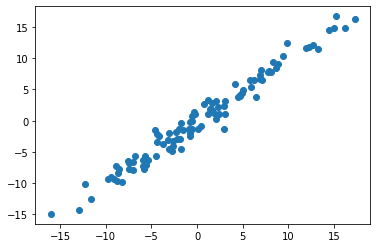

In [4]:
plt.scatter(x, y)

In [5]:
def error(x, y, w):
    return 1 / 2 * np.sum((w[0] * x + w[1] - y) ** 2)

def grad_error(x, y, w):
    return np.array([np.sum((w[0] * x + w[1] - y) * x), np.sum(w[0] * x + w[1] - y)])

In [6]:
def gradient_descent(x, y, f, grad_f, tol=1e-5, max_iter=1000):
    np.random.seed(42)
    w = np.random.uniform(0, 1, (2, ))
    n = 0
    alpha = 0.0001
    
    while np.linalg.norm(grad_f(x, y, w)) >= tol and n < max_iter:        
        n = n + 1
        w = w - alpha * grad_f(x, y, w)
    
    return w, n

In [7]:
w_opt, n = gradient_descent(x, y, error, grad_error)
print(w_opt)

[ 0.98745097 -0.08541557]


In [8]:
def plot_fitted_line(x, y, w, title='', y_range=None):
    plt.clf()
    
    plt.plot(x, w[0] * x + w[1], 'r')
    plt.scatter(x, y)
    
    plt.title(title)
    
    if y_range:
        plt.ylim(*y_range)
    
    plt.show()

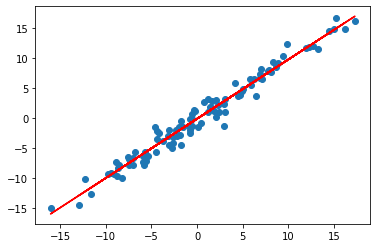

In [9]:
plot_fitted_line(x, y, w_opt)

Adding an outlier

In [10]:
x_noisy = np.copy(x)
y_noisy = np.copy(y)

x_noisy[1] = -40
y_noisy[1] = 20

In [11]:
w_opt, n = gradient_descent(x_noisy, y_noisy, error, grad_error)
print(w_opt)

[0.62834048 0.51784914]


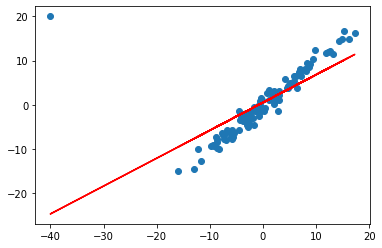

In [12]:
plot_fitted_line(x_noisy, y_noisy, w_opt)

In [13]:
def generate_noisy_sample(x, y, prop=0.1):
    noisy_x = np.copy(x)
    noisy_y = np.copy(y)
    
    num_points = int(x.shape[0] * prop)
    noisy_idx = np.random.choice(x.shape[0], num_points)
    
    noisy_x[noisy_idx] = np.random.choice(np.arange(-40, 40), size=num_points)
    noisy_y[noisy_idx] = np.random.choice(np.arange(-20, 20), size=num_points)
    
    return noisy_x, noisy_y

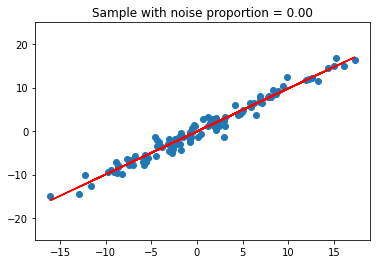

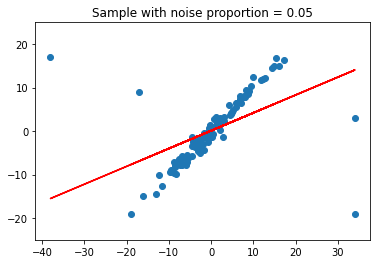

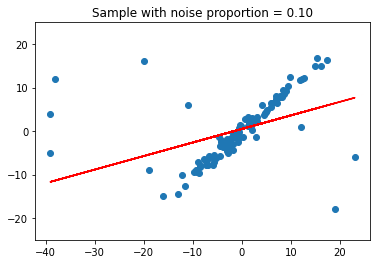

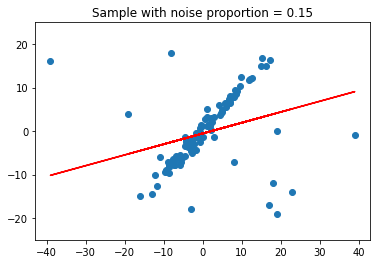

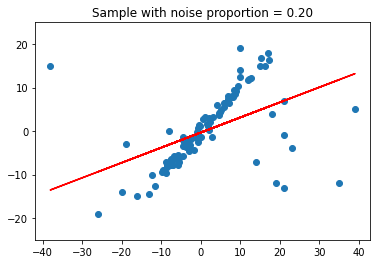

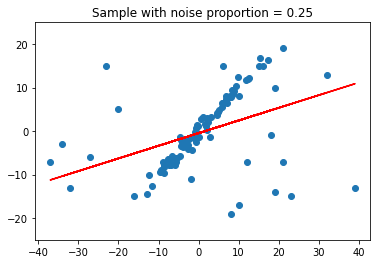

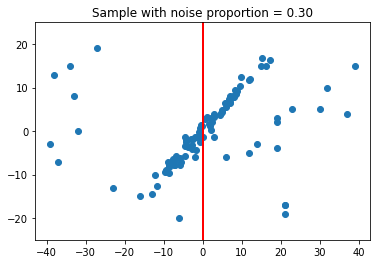

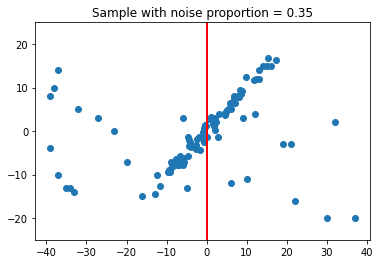

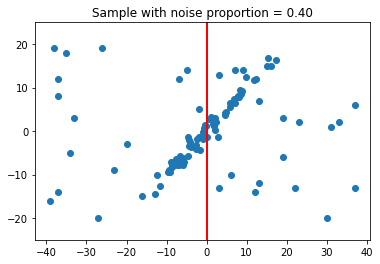

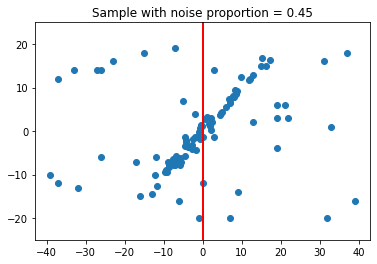

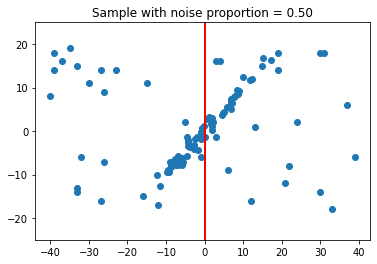

In [14]:
noise_props = np.arange(0, 0.55, 0.05)

for prop in noise_props:
    # Generate noisy sample
    x_noisy, y_noisy = generate_noisy_sample(x, y, prop=prop)
    
    w_opt, n = gradient_descent(x_noisy, y_noisy, error, grad_error)
    
    plot_fitted_line(x_noisy, y_noisy, w_opt, title=f'Sample with noise proportion = {prop:.2f}', y_range=(-25, 25))

## 2. ROBUST FUNCTIONS

In [15]:
def least_squares_function(u):
    return 0.5 * u**2

def cauchy_function(u, c=1):
    return (c**2 / 2) * np.log(1 + (u / c)**2)

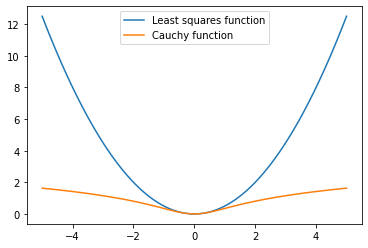

In [16]:
x_values = np.linspace(-5, 5, 100)

plt.clf()

plt.plot(x_values, least_squares_function(x_values), label='Least squares function')
plt.plot(x_values, cauchy_function(x_values), label='Cauchy function')

plt.legend()
plt.show()

In [17]:
def cauchy(x, y, w, c=1):
    return (c**2 / 2) * np.sum(np.log(1 + ((w[0] * x + w[1] - y) / c)**2))


def grad_cauchy(x, y, w, c=1):
    error = w[0] * x + w[1] - y
    error_ratio = (c**2 * error) / (c**2 + error**2)
    
    return np.array([np.sum(x * error_ratio), np.sum(error_ratio)])

def gradient_descent_cauchy(x, y, c=1, tol=1e-5, max_iter=1000):
    np.random.seed(42)
    w = np.random.uniform(0, 1, (2, ))
    n = 0
    alpha = 0.0001
    
    while np.linalg.norm(grad_cauchy(x, y, w)) >= tol and n < max_iter:        
        n = n + 1
        w = w - alpha * grad_cauchy(x, y, w, c)
    
    return w, n

In [18]:
def plot_fitted_line_comparison(x, y, w_ls, w_cauchy):
    plt.clf()
    
    fig = plt.figure(figsize=(15, 6))
    
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    
    ax1.scatter(x, y)
    ax1.plot(x, w_ls[0] * x + w_ls[1], 'r')
    ax1.title.set_text('Gradient descent with LS error function')
    
    ax2.scatter(x, y)
    ax2.plot(x, w_cauchy[0] * x + w_cauchy[1], 'r')
    ax2.title.set_text('Gradient descent with Cauchy error function')
    
    plt.show()

In [19]:
w_ls, n = gradient_descent(x, y, error, grad_error)
w_cauchy, n = gradient_descent_cauchy(x, y)

print(w_ls)
print(w_cauchy)

[ 0.98745097 -0.08541557]
[0.97976744 0.02004194]


<Figure size 432x288 with 0 Axes>

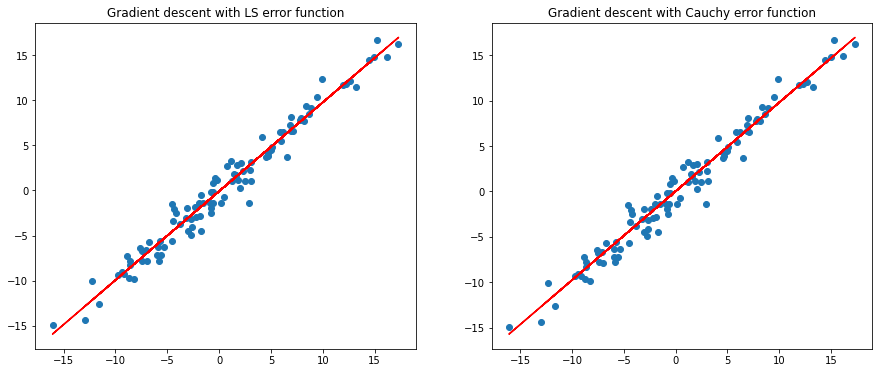

In [20]:
plot_fitted_line_comparison(x, y, w_ls, w_cauchy)

In [21]:
x_noisy = np.copy(x)
y_noisy = np.copy(y)

x_noisy[1] = -40
y_noisy[1] = 20

In [22]:
w_ls, n = gradient_descent(x_noisy, y_noisy, error, grad_error)
w_cauchy, n = gradient_descent_cauchy(x_noisy, y_noisy)

print(w_ls)
print(w_cauchy)

[0.62834048 0.51784914]
[0.9793393  0.01293129]


<Figure size 432x288 with 0 Axes>

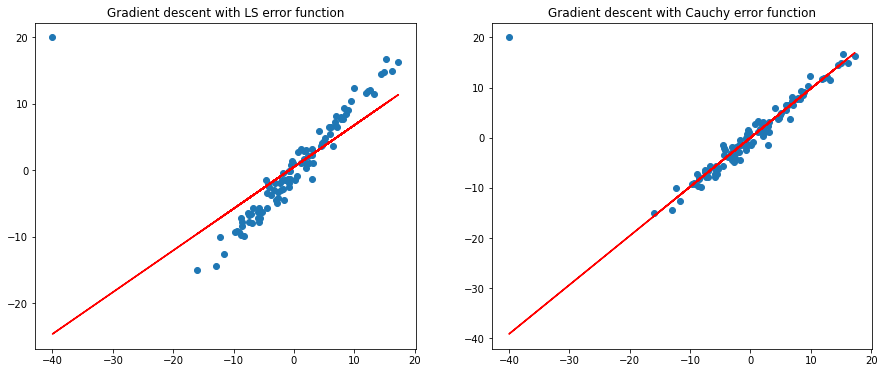

In [23]:
plot_fitted_line_comparison(x_noisy, y_noisy, w_ls, w_cauchy)

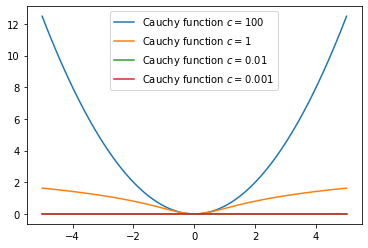

In [24]:
x_values = np.linspace(-5, 5, 100)
c_values = (100, 1, 0.01, 0.001)

plt.clf()

for c in c_values:
    plt.plot(x_values, cauchy_function(x_values, c=c), label=fr'Cauchy function $c={c}$')

plt.legend()
plt.show()

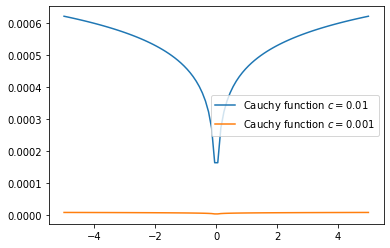

In [25]:
x_values = np.linspace(-5, 5, 100)
c_values = (0.01, 0.001)

plt.clf()

for c in c_values:
    plt.plot(x_values, cauchy_function(x_values, c=c), label=fr'Cauchy function $c={c}$')

plt.legend()
plt.show()

LS solution: [ 0.98745097 -0.08541557]	Cauchy solution with c = 1: [0.97976744 0.02004194]


<Figure size 432x288 with 0 Axes>

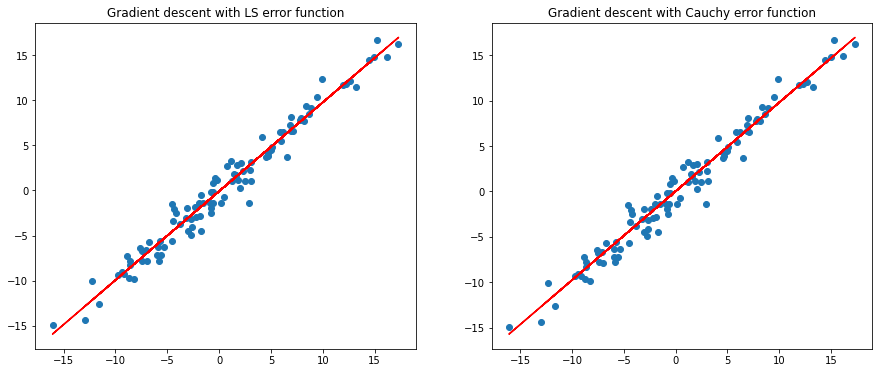

LS solution: [ 0.98745097 -0.08541557]	Cauchy solution with c = 100: [ 0.98745474 -0.0853818 ]


<Figure size 432x288 with 0 Axes>

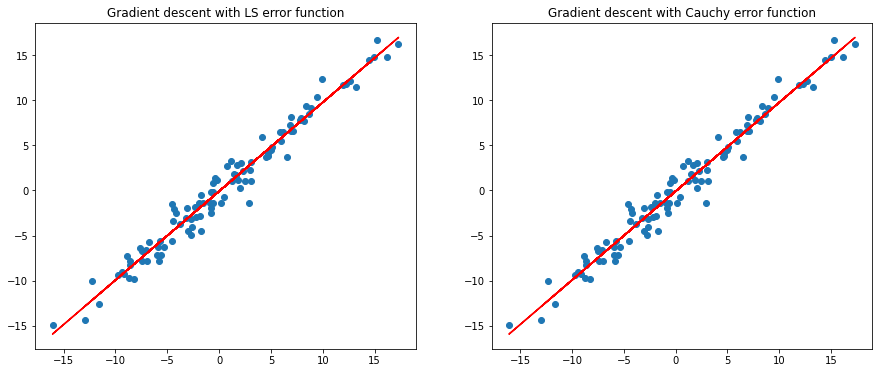

LS solution: [ 0.98745097 -0.08541557]	Cauchy solution with c = 0.01: [0.37618636 0.95104446]


<Figure size 432x288 with 0 Axes>

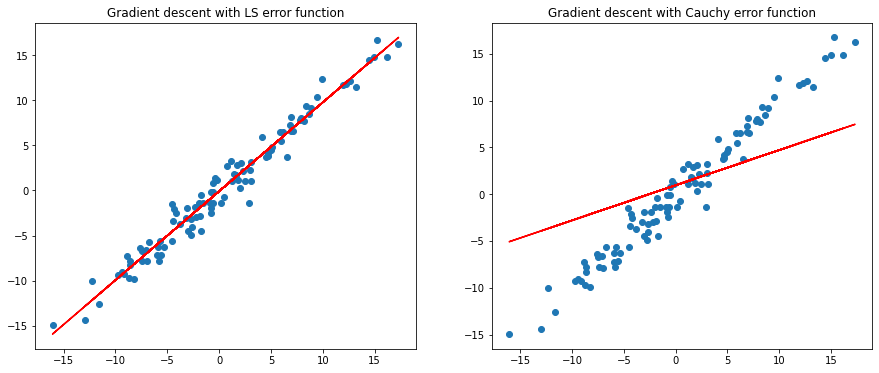

LS solution: [ 0.98745097 -0.08541557]	Cauchy solution with c = 0.001: [0.37455645 0.95071768]


<Figure size 432x288 with 0 Axes>

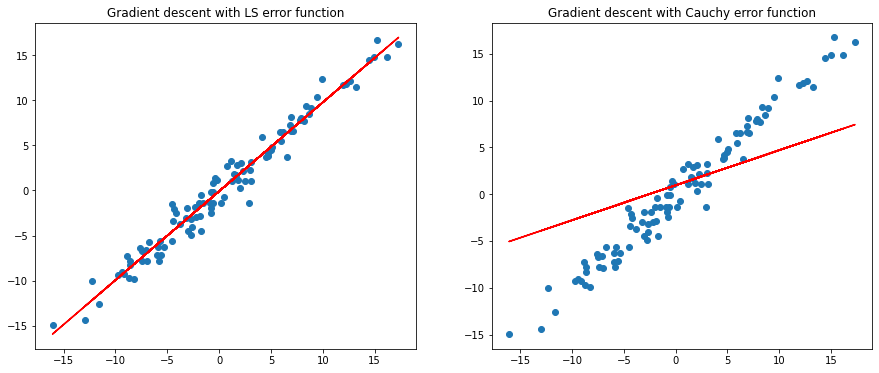

In [26]:
c_values = (1, 100, 0.01, 0.001)

for c in c_values:
    w_ls, n = gradient_descent(x, y, error, grad_error)
    w_cauchy, n = gradient_descent_cauchy(x, y, c=c)
    
    print(f'LS solution: {w_ls}\tCauchy solution with c = {c}: {w_cauchy}')
    
    plot_fitted_line_comparison(x, y, w_ls, w_cauchy)

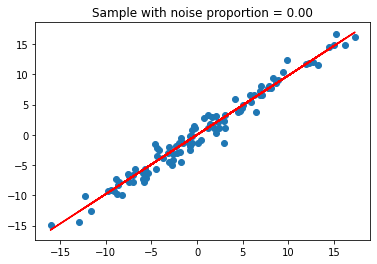

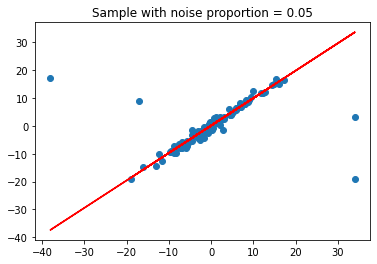

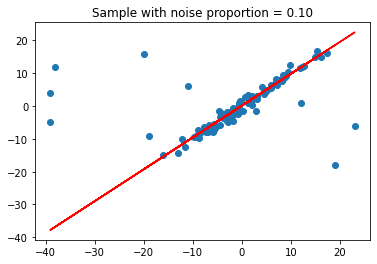

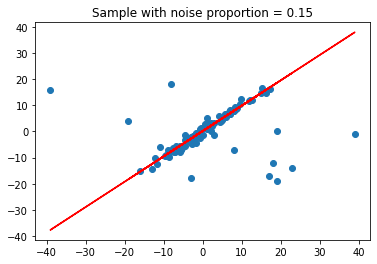

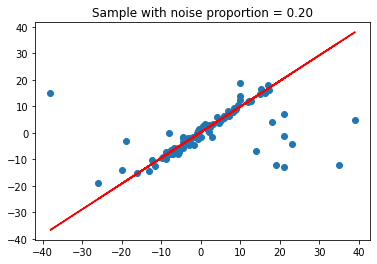

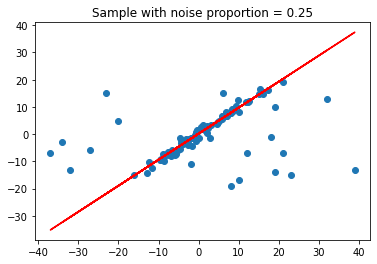

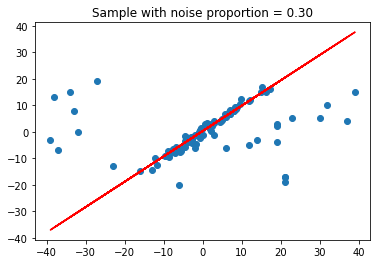

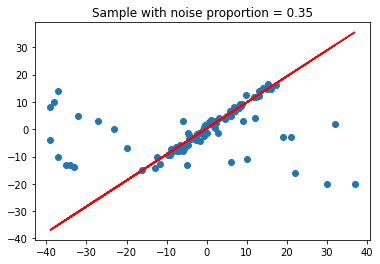

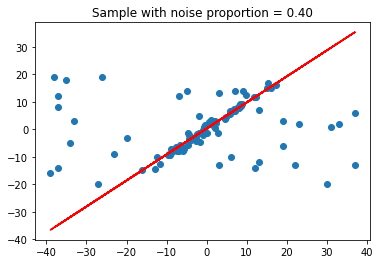

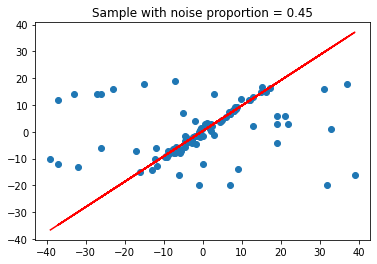

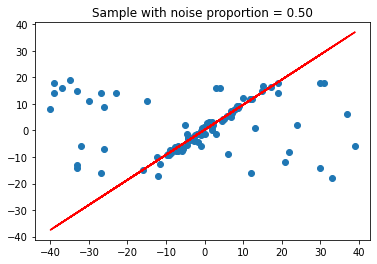

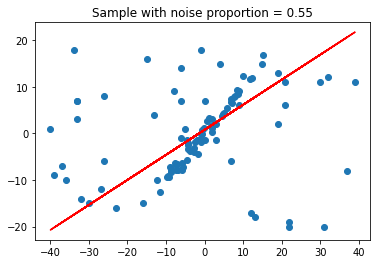

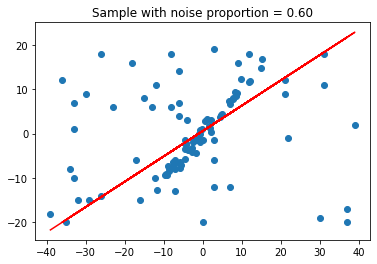

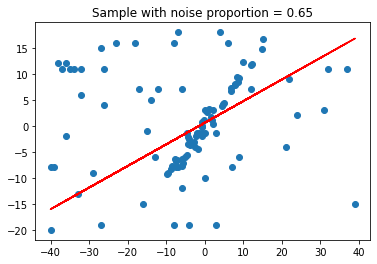

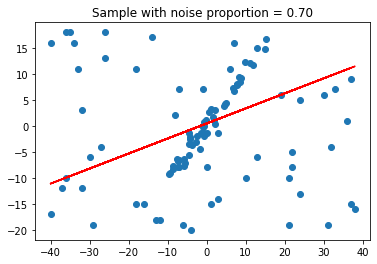

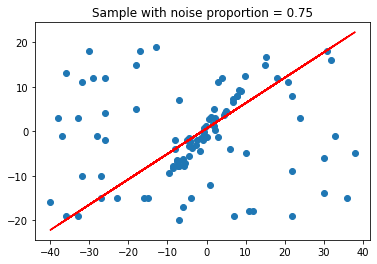

In [27]:
noise_props = np.arange(0, 0.8, 0.05)

for prop in noise_props:
    # Generate noisy sample
    x_noisy, y_noisy = generate_noisy_sample(x, y, prop=prop)
    
    w_opt, n = gradient_descent_cauchy(x_noisy, y_noisy, c=1)
    
    plot_fitted_line(x_noisy, y_noisy, w_opt, title=f'Sample with noise proportion = {prop:.2f}')

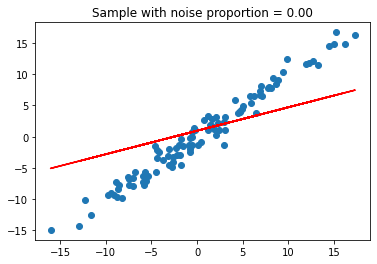

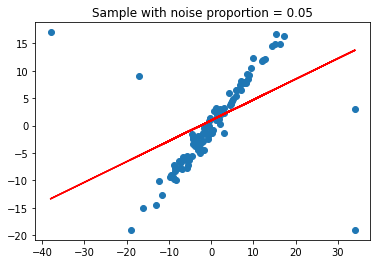

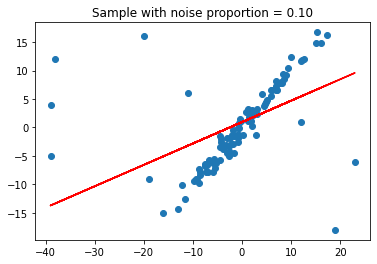

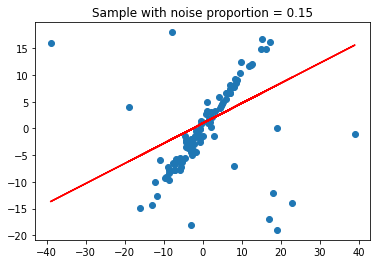

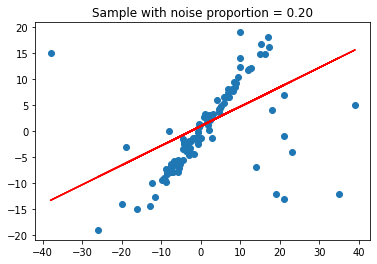

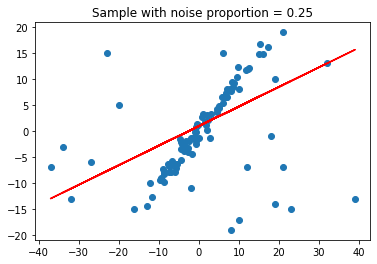

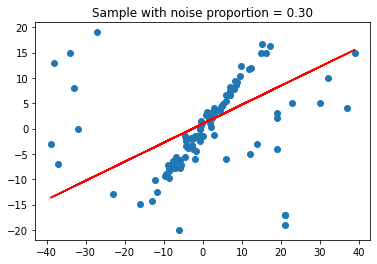

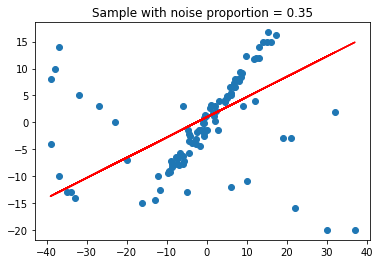

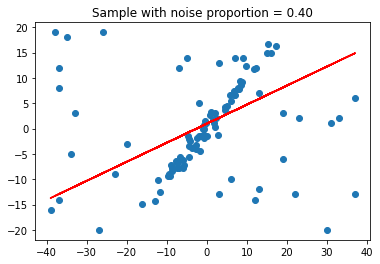

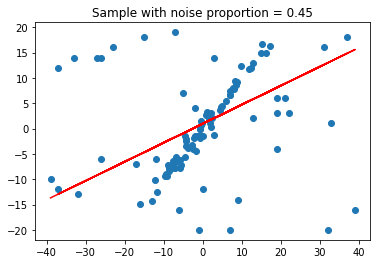

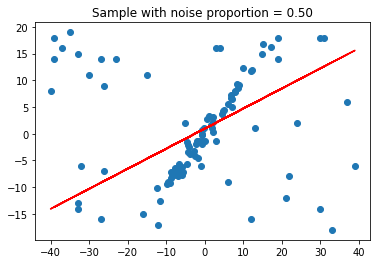

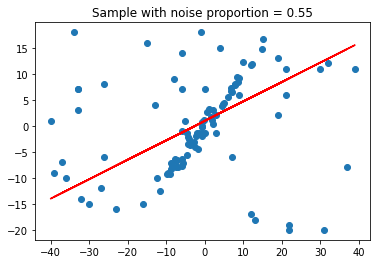

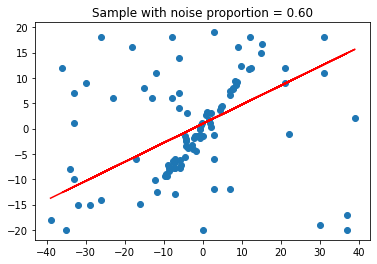

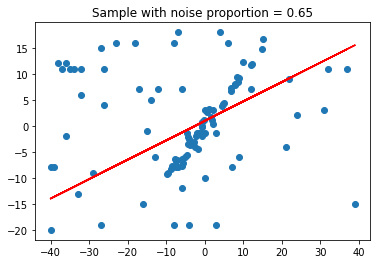

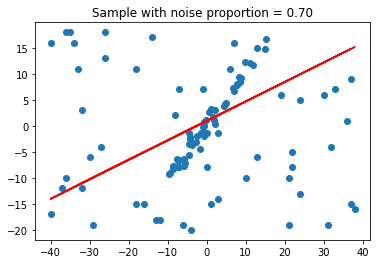

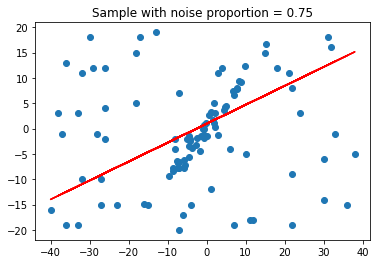

In [28]:
noise_props = np.arange(0, 0.8, 0.05)

for prop in noise_props:
    # Generate noisy sample
    x_noisy, y_noisy = generate_noisy_sample(x, y, prop=prop)
    
    w_opt, n = gradient_descent_cauchy(x_noisy, y_noisy, c=0.01)
    
    plot_fitted_line(x_noisy, y_noisy, w_opt, title=f'Sample with noise proportion = {prop:.2f}')